Predicting the star rating of an Amazon Alexa review based off the review text using a neural network

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras import losses
from keras import metrics
from keras import models
from keras import layers
dataset = pd.read_csv('C:/Users/natha/ThirdYear/Keras_Projects/Data/amazon_alexa.tsv', delimiter = '\t', quoting = 3)
dataset[:10]

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1
6,3,31-Jul-18,Sandstone Fabric,"""Without having a cellphone, I cannot use many...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,"""Love it! I’ve listened to songs I haven’t hea...",1


In [26]:
#remove stop words and stem(doing -> do, trusted -> trust)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['verified_reviews'][i] )
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [29]:
#creating a bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,0].values

array([5, 5, 4, ..., 5, 5, 4], dtype=int64)

In [43]:
#changing ratings label to one hot vectors e.g 3 star rating would be [0,0,1,0,0]
def to_one_hot(labels, dimension = 5):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label-1] = 1.
    return results
one_hot_labels = to_one_hot(y)

#splitting data in to train, validation and test sets

val_y = one_hot_labels[:800]
train_y = one_hot_labels[800:2150]
test_y = one_hot_labels[2150:3150]

val_x = X[:800]
train_x = X[800:2150]
test_x = X[2150:3150]

In [67]:
#creating network
model = models.Sequential()

model.add(layers.Dense(8, activation = 'relu', input_shape= (1500,)))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(5, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
#executing the network
history = model.fit(train_x, 
                    train_y,
                   epochs = 25,
                   batch_size = 128,
                   validation_data =(val_x, val_y))

Train on 1350 samples, validate on 800 samples
Epoch 1/25
1350/1350 [==============================] - 0s 275us/step - loss: 1.5041 - acc: 0.6696 - val_loss: 1.4311 - val_acc: 0.7388
Epoch 2/25
1350/1350 [==============================] - 0s 46us/step - loss: 1.3776 - acc: 0.7141 - val_loss: 1.3430 - val_acc: 0.7388
Epoch 3/25
1350/1350 [==============================] - 0s 41us/step - loss: 1.2889 - acc: 0.7148 - val_loss: 1.2649 - val_acc: 0.7388
Epoch 4/25
1350/1350 [==============================] - 0s 45us/step - loss: 1.2122 - acc: 0.7148 - val_loss: 1.1976 - val_acc: 0.7388
Epoch 5/25
1350/1350 [==============================] - 0s 44us/step - loss: 1.1405 - acc: 0.7148 - val_loss: 1.1366 - val_acc: 0.7388
Epoch 6/25
1350/1350 [==============================] - 0s 63us/step - loss: 1.0723 - acc: 0.7156 - val_loss: 1.0797 - val_acc: 0.7388
Epoch 7/25
1350/1350 [==============================] - 0s 47us/step - loss: 1.0063 - acc: 0.7185 - val_loss: 1.0235 - val_acc: 0.7388
Epoch 8

In [68]:
results = model.evaluate(test_x, test_y)
print('Loss, Accuracy', results)

1000/1000 [==============================] - 0s 36us/step
Loss, Accuracy [0.8011757717132568, 0.733]


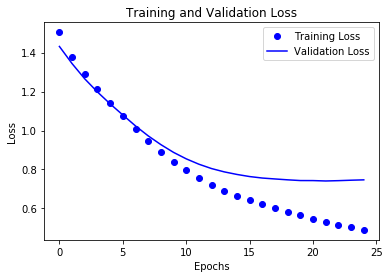

In [69]:
history_dict = history.history
loss = history_dict['loss']
acc = history_dict['val_loss']

epochs = range(0 , len(loss), + 1)
#plotting the results to check for overfitting
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, acc, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#the graph shows that the training begins to cause overfitting after around 10 epochs